hello LR scheduler fan

do I have an LR scheduler for you

cosine annealing with restarts + [decay](https://stackoverflow.com/a/73747249/5257399) + linear warmup

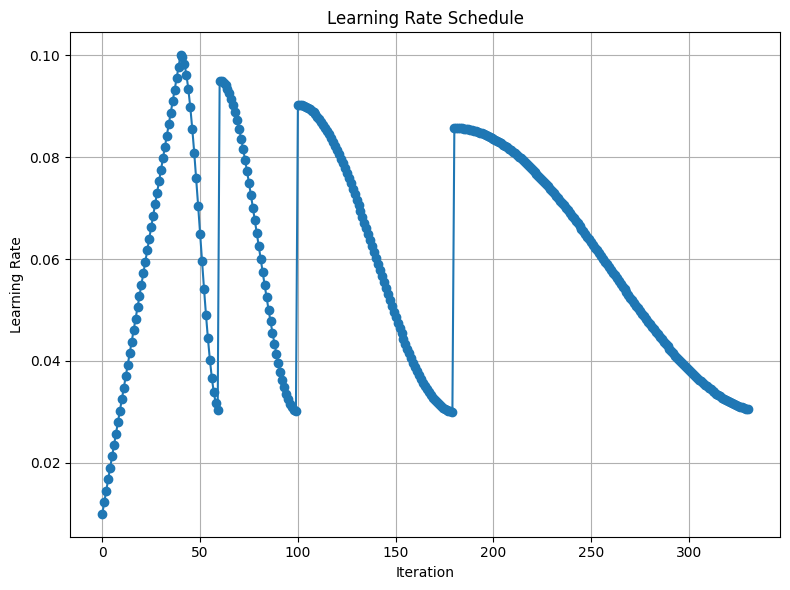

In [20]:
import sys
module_root = '..'
if module_root not in sys.path:
  sys.path.insert(0, module_root)
from importlib import reload

import src.bonus.cosine_annealing_warm_restarts_decay_warmup as LR
# we reload the module every time the Jupyter cell is run, in case you wanted to make changes
# to that file and run this cell again and see your changes reflected
reload(LR)

# from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts
from torch.optim.adamw import AdamW
from torch.nn import Linear
from typing import List
import torch
import matplotlib.pyplot as plt

model = Linear(4, 3, bias=False, dtype=torch.float32)
initial_lr=0.1
optim = AdamW([{
  'params': model.parameters(),
  'initial_lr': initial_lr,
}], lr=initial_lr)

warmup_start_factor=.1
eta_min=initial_lr*warmup_start_factor*3
sched = LR.CosineAnnealingWarmRestartsDecayWarmup(optim, T_0=20, warmup=40, warmup_start_factor=warmup_start_factor, decay=.95, T_mult=2, eta_min=eta_min, verbose=False)

lrs: List[int] = []
lrs.append(optim.param_groups[0]['lr'])
for step in range(330):
  optim.step()
  sched.step()
  lrs.append(optim.param_groups[0]['lr'])

plt.figure(figsize=(8, 6))  # Optional: Set the figure size

plt.plot(lrs, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Iteration')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')

# Show the plot
plt.grid(True)  # Optional: Add a grid
plt.tight_layout()  # Optional: Improve spacing
plt.show()

and yes it appears to support resuming during the warmup and during the cosine:

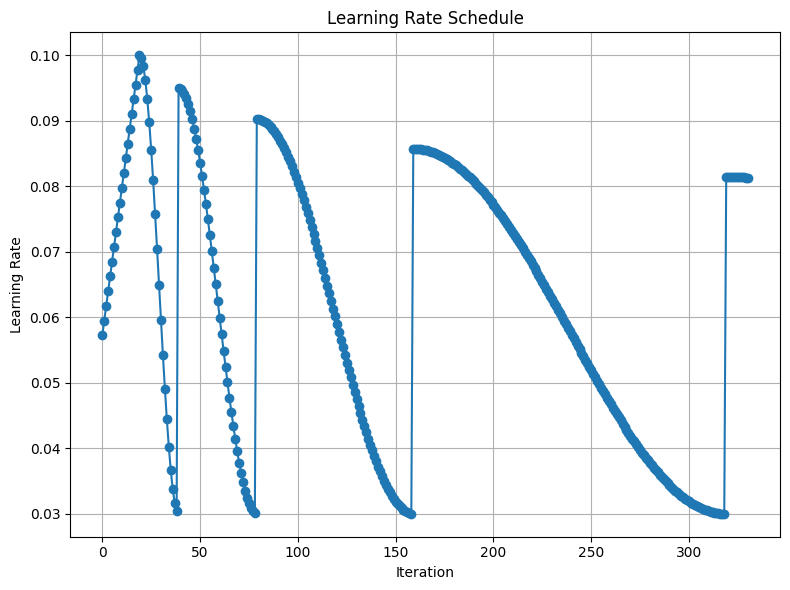

In [4]:
import sys
module_root = '..'
if module_root not in sys.path:
  sys.path.insert(0, module_root)
from importlib import reload

import src.bonus.cosine_annealing_warm_restarts_decay_warmup as LR
# we reload the module every time the Jupyter cell is run, in case you wanted to make changes
# to that file and run this cell again and see your changes reflected
reload(LR)

# from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts
from torch.optim.adamw import AdamW
from torch.nn import Linear
from typing import List
import torch
import matplotlib.pyplot as plt

model = Linear(4, 3, bias=False, dtype=torch.float32)
initial_lr=0.1
optim = AdamW([{
  'params': model.parameters(),
  'initial_lr': initial_lr,
}], lr=initial_lr)

warmup_start_factor=.1
eta_min=initial_lr*warmup_start_factor*3
sched = LR.CosineAnnealingWarmRestartsDecayWarmup(optim, last_epoch=20, T_0=20, warmup=40, warmup_start_factor=warmup_start_factor, decay=.95, T_mult=2, eta_min=eta_min, verbose=False)

lrs: List[int] = []
lrs.append(optim.param_groups[0]['lr'])
for step in range(330):
  optim.step()
  sched.step()
  lrs.append(optim.param_groups[0]['lr'])

plt.figure(figsize=(8, 6))  # Optional: Set the figure size

plt.plot(lrs, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Iteration')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')

# Show the plot
plt.grid(True)  # Optional: Add a grid
plt.tight_layout()  # Optional: Improve spacing
plt.show()

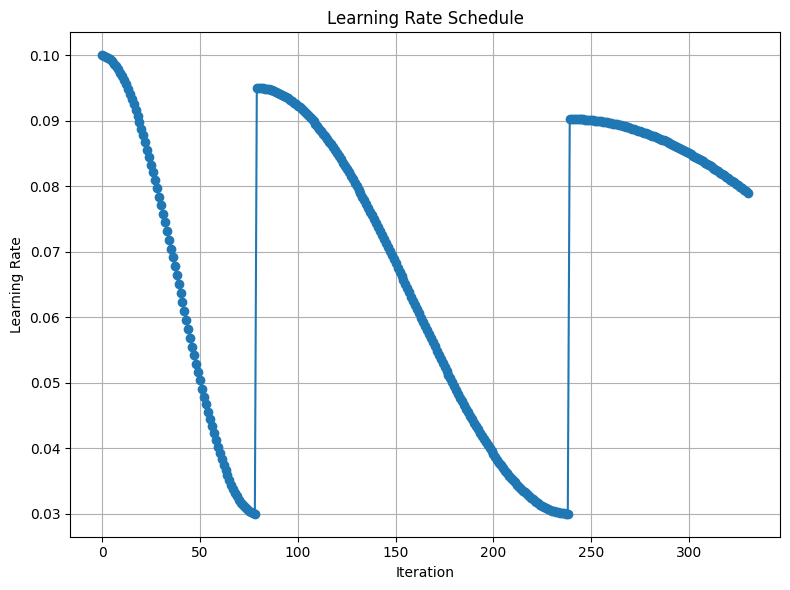

In [3]:
import sys
module_root = '..'
if module_root not in sys.path:
  sys.path.insert(0, module_root)
from importlib import reload

import src.bonus.cosine_annealing_warm_restarts_decay_warmup as LR
# we reload the module every time the Jupyter cell is run, in case you wanted to make changes
# to that file and run this cell again and see your changes reflected
reload(LR)

# from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts
from torch.optim.adamw import AdamW
from torch.nn import Linear
from typing import List
import torch
import matplotlib.pyplot as plt

model = Linear(4, 3, bias=False, dtype=torch.float32)
initial_lr=0.1
optim = AdamW([{
  'params': model.parameters(),
  'initial_lr': initial_lr,
}], lr=initial_lr)

warmup_start_factor=.1
eta_min=initial_lr*warmup_start_factor*3
sched = LR.CosineAnnealingWarmRestartsDecayWarmup(optim, last_epoch=100, T_0=20, warmup=40, warmup_start_factor=warmup_start_factor, decay=.95, T_mult=2, eta_min=eta_min, verbose=False)

lrs: List[int] = []
lrs.append(optim.param_groups[0]['lr'])
for step in range(330):
  optim.step()
  sched.step()
  lrs.append(optim.param_groups[0]['lr'])

plt.figure(figsize=(8, 6))  # Optional: Set the figure size

plt.plot(lrs, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Iteration')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')

# Show the plot
plt.grid(True)  # Optional: Add a grid
plt.tight_layout()  # Optional: Improve spacing
plt.show()